In [2]:
# importing required libraries

import pandas as pd
import numpy as np
import math
from scipy import stats
from statistics import mode
from scipy.stats import chi2
from datetime import date, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
sns.set()


<font color='darkorange'>
    
### Analysis of the attribute dataset 
    
    
</font>

In [3]:
# reading 1st data excel containing the dresses attributes and it's recommendations 

df_attr = pd.read_excel('Attribute DataSet.xlsx')

In [4]:
# Verifying the first 5 reords in the excel

df_attr.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [5]:
# Verifying the last 5 records in the excel

df_attr.tail()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1
499,919930954,Casual,Low,4.4,free,Summer,v-neck,short,empire,cotton,Corduroy,lace,solid,0


In [6]:
# Veirfying the overall data-size Row X Columns

df_attr.shape

(500, 14)

In [7]:
# Verifying the columns information in the attribute dataset

df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [8]:
# finding the sum of the missing values for different columns - 

print('Number of null values: ')
df_attr.isna().sum()

Number of null values: 


Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [9]:
# finding unique value in each categorical data columns

for colns in df_attr.select_dtypes(include='object'):
    print('Unique value for {} column is: '.format(colns))
    print(df_attr[colns].unique())
    print('*' *80)

Unique value for Style column is: 
['Sexy' 'Casual' 'vintage' 'Brief' 'cute' 'bohemian' 'Novelty' 'Flare'
 'party' 'sexy' 'work' 'OL' 'fashion']
********************************************************************************
Unique value for Price column is: 
['Low' 'High' 'Average' 'Medium' 'very-high' 'low' 'high' nan]
********************************************************************************
Unique value for Size column is: 
['M' 'L' 'XL' 'free' 'S' 'small' 's']
********************************************************************************
Unique value for Season column is: 
['Summer' 'Automn' 'Spring' 'Winter' 'spring' 'winter' nan 'summer'
 'Autumn']
********************************************************************************
Unique value for NeckLine column is: 
['o-neck' 'v-neck' 'boat-neck' 'peterpan-collor' 'ruffled'
 'turndowncollor' 'slash-neck' 'mandarin-collor' 'open' 'sqare-collor'
 'Sweetheart' 'sweetheart' nan 'Scoop' 'halter' 'backless' 'bowneck']
********

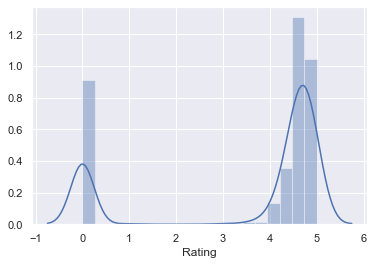

In [11]:
# verifying the data distribution for the 'Rating' column of float data type

sns.distplot(df_attr['Rating'])

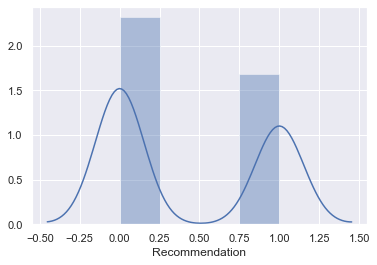

In [10]:
# verifying the data distribution for the 'Recommendation' column of int data type

sns.distplot(df_attr['Recommendation'])

<font color='indigo'>
    
### Key Takeways
    
1. 2-columns are of integer data type, including dependent column 'Recommendation'. <br>
2. 13-Columns are of object data typ, including 'Price' column. <br>
3. waiseline, Material, FabricType, Decoration, and Pattern Type columns have several data missing. <br>
4. Unique values are - misspelled, upper-lower cases mixed, Synonymous words are used. <br>
5. Rating column is showing several zero values, but in general rating should be in between 1-5. <br>
5. We need to treat all these problems separately.
    
</font>

<font color='orange'>
    
### Handling the unique value problems for categorical data
    
    
</font>

In [12]:
# replacing unique values with appropriate value

df_attr['Style'].replace({"sexy": "Sexy"}, inplace=True)
df_attr['Price'].replace({"low": "Low" , "high": "High"}, inplace=True)
df_attr['Size'].replace({"small": "S" , "s": "S"}, inplace=True)
df_attr['Season'].replace({"spring": "Spring" , "summer": "Summer", "Automn": "Autumn", "winter": "Winter"}, inplace=True)
df_attr['NeckLine'].replace({"sweetheart": "Sweetheart"}, inplace=True)
df_attr['SleeveLength'].replace({"sleevless": "Sleeveless" , "sleeveless": "Sleeveless", "sleeevless": "Sleeveless", 
                                "sleveless": "Sleeveless", "threequater":"threequarter", "thressqatar":"threequarter",
                                "capsleeves":"cap-sleeves", "urndowncollor":"turndowncollor", "halfsleeve":"half"}, inplace=True)
df_attr['Material'].replace({"sill": "silk" , "model": "modal", "shiffon":"chiffonfabric"}, inplace=True)
df_attr['FabricType'].replace({"flannael": "flannel" , "shiffon": "chiffon", "knitting":"knitted",
                              "wollen":"woolen", "sattin":"satin"}, inplace=True)
df_attr['Pattern Type'].replace({"leapord": "leopard"}, inplace=True)


#print(df_attr['Pattern Type'].unique())

In [13]:
# Verify changes in unique values

for colns in df_attr.select_dtypes(include='object'):
    print('Unique value for {} column is: '.format(colns))
    print(df_attr[colns].unique())
    print('*' *80)

Unique value for Style column is: 
['Sexy' 'Casual' 'vintage' 'Brief' 'cute' 'bohemian' 'Novelty' 'Flare'
 'party' 'work' 'OL' 'fashion']
********************************************************************************
Unique value for Price column is: 
['Low' 'High' 'Average' 'Medium' 'very-high' nan]
********************************************************************************
Unique value for Size column is: 
['M' 'L' 'XL' 'free' 'S']
********************************************************************************
Unique value for Season column is: 
['Summer' 'Autumn' 'Spring' 'Winter' nan]
********************************************************************************
Unique value for NeckLine column is: 
['o-neck' 'v-neck' 'boat-neck' 'peterpan-collor' 'ruffled'
 'turndowncollor' 'slash-neck' 'mandarin-collor' 'open' 'sqare-collor'
 'Sweetheart' nan 'Scoop' 'halter' 'backless' 'bowneck']
********************************************************************************
Unique va

<font color='orange'>
    
### Handling the missing values
    
    
</font>

#### FabricType and Decoration columns have significant data missing, around more than 50% data are missing. We have to take a call whether to drop the columns or need to update them with the mode value. First we will check the contribution of these two columns on Recommendation count before we drop them. To analyse that we will take the help of Chi-Square method as it is best for categorical data with null-hypothesis.

<font color='crimson'>
    
#### Chi-Square test to check the dependency of the FabricType vs Recommendation columns
    
    
</font>

In [14]:
# Frequency count of fabric type column vs Recommendation -

fab_Rec = [df_attr['FabricType'], df_attr['Recommendation']]
headers = ['FabricType', 'Recommendation']
df_fab_Rec = pd.concat(fab_Rec, axis=1, keys = headers)
#df_fab_Rec

count = df_fab_Rec.groupby(['FabricType', 'Recommendation']).size()
count

FabricType  Recommendation
Corduroy    0                  2
batik       1                  2
broadcloth  0                 20
            1                 11
chiffon     0                 83
            1                 61
dobby       0                  1
            1                  1
flannel     0                  2
jersey      0                  5
            1                  7
knitted     0                  1
            1                  1
lace        1                  1
organza     1                  1
other       0                  1
poplin      1                  2
satin       0                  3
            1                  4
terry       1                  1
tulle       0                  1
            1                  1
woolen      0                  1
            1                  2
worsted     0                 10
            1                  9
dtype: int64

In [15]:
# creating view for Observed table

df_fab_Rec_view = {'Corduroy': [0, 2], 'batik': [2, 0], 'broadcloth': [11, 20], 'chiffon': [61, 83], 'dobby': [1, 1], 
                  'flannel': [0,2], 'jersey': [7, 5], 'knitted': [1, 1], 'lace': [1, 0], 'organza': [1, 0], 'other': [0, 1],
                  'poplin': [2, 0], 'satin': [4, 3], 'terry': [1, 0], 'tulle': [1,1], 'woolen': [2,1], 'worsted': [9, 10] }

df_fab_frq = pd.DataFrame(df_fab_Rec_view, columns = ['Corduroy', 'batik', 'broadcloth', 'chiffon', 'dobby','flannel',
                                                    'jersey','knitted', 'lace', 'organza', 'other', 'poplin', 'satin',
                                                     'terry','tulle', 'woolen', 'worsted' ], 
                          index = ['Recomnd_1_Yes', 'Recomnd_0_No'])


print('Observed table: ')
print('*' * 50 )
print(df_fab_frq)

Observed table: 
**************************************************
               Corduroy  batik  broadcloth  chiffon  dobby  flannel  jersey  \
Recomnd_1_Yes         0      2          11       61      1        0       7   
Recomnd_0_No          2      0          20       83      1        2       5   

               knitted  lace  organza  other  poplin  satin  terry  tulle  \
Recomnd_1_Yes        1     1        1      0       2      4      1      1   
Recomnd_0_No         1     0        0      1       0      3      0      1   

               woolen  worsted  
Recomnd_1_Yes       2        9  
Recomnd_0_No        1       10  


In [16]:
# H0: No significant relationship between febric type and product recommendation.
# H1: There is significant relationship between febric type and product recommendation.

#Now we need to create expected table for the above null hypothesis. Formula -> E = ((row total * column total) / grand total)

Obsv_lst = [0,2,2,0,11,20,61,83,1,1,0,2,7,5,1,1,1,0,1,0,0,1,2,0,4,3,1,0,1,1,2,1,9,10]

# Total for all combinations
grand_Total = sum(Obsv_lst)

# Total sum column wise
To_cls = df_fab_frq.sum(axis=0)

# Total sum row wise
To_rows = df_fab_frq.sum(axis=1)

In [17]:
# Now creating the expected list corresponding to the observed list

def exp_list(To_cls, To_rows):
    Expected_lst = []
    for i in range(len(To_cls)):
        for j in range(len(To_rows)):
            res = (To_cls[i] * To_rows[j]) / grand_Total
            Expected_lst.append(res)
            
    return Expected_lst

Expects_lst = exp_list(To_cls, To_rows)
print('The expected list is: ', Expects_lst)

The expected list is:  [0.8888888888888888, 1.1111111111111112, 0.8888888888888888, 1.1111111111111112, 13.777777777777779, 17.22222222222222, 64.0, 80.0, 0.8888888888888888, 1.1111111111111112, 0.8888888888888888, 1.1111111111111112, 5.333333333333333, 6.666666666666667, 0.8888888888888888, 1.1111111111111112, 0.4444444444444444, 0.5555555555555556, 0.4444444444444444, 0.5555555555555556, 0.4444444444444444, 0.5555555555555556, 0.8888888888888888, 1.1111111111111112, 3.111111111111111, 3.888888888888889, 0.4444444444444444, 0.5555555555555556, 0.8888888888888888, 1.1111111111111112, 1.3333333333333333, 1.6666666666666667, 8.444444444444445, 10.555555555555555]


In [18]:
# Now applying Chi-Square independence formula on Observed and Expected list

Ob_vals = np.array(Obsv_lst) # observed value
Ex_vals = np.array(Expects_lst) # expected value

def chi_sqr(Ob_vals, Ex_vals):
    results = (Ob_vals - Ex_vals)**2 # (O-E)**2
    sum_sqr = 0
    for ele in range(len(results)):
        sum_sqr += (results[ele] / Ex_vals[ele])
    return sum_sqr

X_sqr = chi_sqr(Ob_vals, Ex_vals)

print('Calculated Chi-Square value is: ', X_sqr)

Calculated Chi-Square value is:  16.1466218469561


In [19]:
# At significace level ∝ = 5% = 0.05
# degree of freedom = (2-1) * (22-1) = 21

# prob = 1-0.05 = 0.95
p = 0.95
dof = 21

critical = chi2.ppf(p, dof)
print('Critical value of Chi-Square is: ', critical)

Critical value of Chi-Square is:  32.670573340917315


<font color='green'>
    
### Conclusions
    
The criticial value of Chi-Square is: Χ^2 = 32.67 at 5% level of significance. <br>
Our computed value of Chi-Square is: Χ^2 = 16.15 <br>

So, computed value falls in acceptance region. Hence we accept the Null Hypothesis. <br>
Hence there is no significant relationship between febric type and product recommendation. at 5% level of significance.

    
</font>

<font color='crimson'>
    
#### Chi-Square test to check the dependency of the Decoration vs Recommendation columns
    
    
</font>

In [20]:
# Frequency count of Decoration column vs Recommendation -

deco_Rec = [df_attr['Decoration'], df_attr['Recommendation']]
headers = ['Decoration', 'Recommendation']
df_deco_Rec = pd.concat(deco_Rec, axis=1, keys = headers)
#df_fab_Rec

counts = df_deco_Rec.groupby(['Decoration', 'Recommendation']).size()
counts

Decoration  Recommendation
Tiered      0                  1
applique    0                 12
            1                  9
beading     0                  9
            1                 13
bow         0                 10
            1                  5
button      0                  4
            1                  2
cascading   0                  1
crystal     0                  2
            1                  1
draped      0                  1
            1                  1
embroidary  0                  2
            1                  3
feathers    1                  2
flowers     0                  1
            1                  3
hollowout   0                 16
            1                  5
lace        0                 38
            1                 32
none        0                  1
            1                  1
pearls      0                  1
plain       0                  1
            1                  1
pleat       1                  1
pockets     0   

In [21]:
# creating view for Observed table

df_deco_Rec_view = {'Tiered': [0, 1], 'applique': [9, 12], 'beading': [13, 9], 'bow': [5, 10],'button': [2, 4], 'cascading': [0, 1], 
                  'crystal': [1, 2], 'draped': [1, 1], 'embroidary': [3, 2], 'feathers': [2, 0], 'flowers': [3, 1],'hollowout': [5, 16], 
                'lace': [32, 38], 'none': [1, 1], 'pearls': [0, 1], 'plain': [1, 1], 'pleat': [1, 0], 'pockets': [2, 3], 
                'rivet': [0, 3], 'ruched': [1,2], 'ruffles': [7,10], 'sashes': [14,28], 'sequined': [8, 6], 'tassel': [1,0] }


df_deco_frq = pd.DataFrame(df_deco_Rec_view, columns = ['Tiered', 'applique', 'beading', 'bow', 'button', 'cascading','crystal', 'draped',
                                                    'embroidary','feathers', 'flowers', 'hollowout', 'lace', 'none', 'pearls', 'plain', 'pleat',
                                                      'pockets','rivet', 'ruched', 'ruffles', 'sashes', 'sequined', 'tassel'], 
                          index = ['Recomnd_1_Yes', 'Recomnd_0_No'])


print('Observed table: ')
print('*' * 50 )
print(df_deco_frq)

Observed table: 
**************************************************
               Tiered  applique  beading  bow  button  cascading  crystal  \
Recomnd_1_Yes       0         9       13    5       2          0        1   
Recomnd_0_No        1        12        9   10       4          1        2   

               draped  embroidary  feathers  ...  pearls  plain  pleat  \
Recomnd_1_Yes       1           3         2  ...       0      1      1   
Recomnd_0_No        1           2         0  ...       1      1      0   

               pockets  rivet  ruched  ruffles  sashes  sequined  tassel  
Recomnd_1_Yes        2      0       1        7      14         8       1  
Recomnd_0_No         3      3       2       10      28         6       0  

[2 rows x 24 columns]


In [22]:
# H0: No significant relationship between Decoration type and product recommendation.
# H1: There is significant relationship between Decoration type and product recommendation.

#Now we need to create expected table for the above null hypothesis. Formula -> E = ((row total * column total) / grand total)

Obsv_lst = [0,1,9,12,13,9,5,10,2,4,0,1,1,2,1,1,3,2,2,0,3,1,5,16,32,38,1,1,0,1,1,1,1,0,2,3,0,3,1,2,7,10,14,28,8,6,1,0]

# Total for all combinations
grand_Total = sum(Obsv_lst)

# Total sum column wise
To_cls = df_deco_frq.sum(axis=0)

# Total sum row wise
To_rows = df_deco_frq.sum(axis=1)

In [23]:
# Now creating the expected list corresponding to the observed list

def exp_list(To_cls, To_rows):
    Expected_lst = []
    for i in range(len(To_cls)):
        for j in range(len(To_rows)):
            res = (To_cls[i] * To_rows[j]) / grand_Total
            Expected_lst.append(res)
            
    return Expected_lst

Expects_lst = exp_list(To_cls, To_rows)
print('The expected list is: ', Expects_lst)

The expected list is:  [0.42424242424242425, 0.5757575757575758, 8.909090909090908, 12.090909090909092, 9.333333333333334, 12.666666666666666, 6.363636363636363, 8.636363636363637, 2.5454545454545454, 3.4545454545454546, 0.42424242424242425, 0.5757575757575758, 1.2727272727272727, 1.7272727272727273, 0.8484848484848485, 1.1515151515151516, 2.121212121212121, 2.878787878787879, 0.8484848484848485, 1.1515151515151516, 1.696969696969697, 2.303030303030303, 8.909090909090908, 12.090909090909092, 29.696969696969695, 40.303030303030305, 0.8484848484848485, 1.1515151515151516, 0.42424242424242425, 0.5757575757575758, 0.8484848484848485, 1.1515151515151516, 0.42424242424242425, 0.5757575757575758, 2.121212121212121, 2.878787878787879, 1.2727272727272727, 1.7272727272727273, 1.2727272727272727, 1.7272727272727273, 7.212121212121212, 9.787878787878787, 17.818181818181817, 24.181818181818183, 5.9393939393939394, 8.06060606060606, 0.42424242424242425, 0.5757575757575758]


In [24]:
# Now applying Chi-Square independence formula on Observed and Expected list

Ob_vals = np.array(Obsv_lst) # observed value
Ex_vals = np.array(Expects_lst) # expected value

def chi_sqr(Ob_vals, Ex_vals):
    results = (Ob_vals - Ex_vals)**2 # (O-E)**2
    sum_sqr = 0
    for ele in range(len(results)):
        sum_sqr += (results[ele] / Ex_vals[ele])
    return sum_sqr

X_sqr = chi_sqr(Ob_vals, Ex_vals)

print('Calculated Chi-Square value is: ', X_sqr)

Calculated Chi-Square value is:  21.752592089467363


In [25]:
# At significace level ∝ = 5% = 0.05
# degree of freedom = (2-1) * (22-1) = 21

# prob = 1-0.05 = 0.95
p = 0.95
dof = 21

critical = chi2.ppf(p, dof)
print('Critical value of Chi-Square is: ', critical)

Critical value of Chi-Square is:  32.670573340917315


<font color='green'>
    
### Conclusions
    
The criticial value of Chi-Square is: Χ^2 = 32.67 at 5% level of significance. <br>
Our computed value of Chi-Square is: Χ^2 = 21.75 <br>

So, computed value falls in acceptance region. Hence we accept the Null Hypothesis. <br>
Hence there is no significant relationship between Decoration type and product recommendation. at 5% level of significance.

    
</font>

<font color='green'>
    
### Decission

From Chi-Square test we observed that 'FabricType' and 'Decoration' columns are not significantly important for product recommendation, so we are dropping both the columns.

    
</font>

In [26]:
# dropping FabricType and Decoration columns

df_attr_drop = df_attr.drop(['FabricType', 'Decoration'], axis=1)

In [27]:
df_attr_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  Pattern Type    391 non-null    object 
 11  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 47.0+ KB


#### Other columns having less number of data missing, will be updated with 'Mode' value of that specific column to mitigate the null value data issue.

<font color='crimson'>
    
#### Less number of missing data columns are updated with mode value of that column
    
    
</font>

In [28]:
# updating other columns with the 'Mode' value as they have less number of data missing.


colns = ['Price','Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'Pattern Type']

df_attr_drop[colns] = df_attr_drop[colns].fillna(df_attr_drop.mode().iloc[0])

In [29]:
df_attr_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           500 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          500 non-null    object 
 6   NeckLine        500 non-null    object 
 7   SleeveLength    500 non-null    object 
 8   waiseline       500 non-null    object 
 9   Material        500 non-null    object 
 10  Pattern Type    500 non-null    object 
 11  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 47.0+ KB


<font color='crimson'>
    
#### Zero values in the 'Rating' column updated with mean value of the column
    
    
</font>

In [30]:
df_attr_drop['Rating'].replace(0.0, df_attr_drop['Rating'].mean(axis=0), inplace=True)

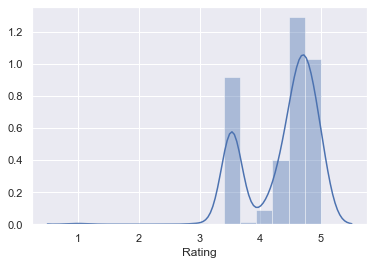

In [31]:
# Verifying the distribution again for the 'Rating' column -

sns.distplot(df_attr_drop['Rating'])

In [32]:
df_attr_drop.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6000,M,Summer,o-neck,Sleeveless,empire,cotton,animal,1
1,1212192089,Casual,Low,3.5286,L,Summer,o-neck,Petal,natural,microfiber,animal,0
2,1190380701,vintage,High,3.5286,L,Autumn,o-neck,full,natural,polyster,print,0
3,966005983,Brief,Average,4.6000,L,Spring,o-neck,full,natural,silk,print,1
4,876339541,cute,Low,4.5000,M,Summer,o-neck,butterfly,natural,chiffonfabric,dot,0


<font color='darkorange'>
    
### Analysis of the Sales dataset 
    
    
</font>

In [33]:
# Reading 2nd data excel containing Sales records and corresponding dresses ID.

df_sales = pd.read_excel('Dress Sales.xlsx')

In [34]:
# Verifying first 5 records in the data excel

df_sales.head()

,Dress_ID,29/8/2013,31/8/2013,2013-02-09 00:00:00,2013-04-09 00:00:00,2013-06-09 00:00:00,2013-08-09 00:00:00,2013-10-09 00:00:00,2013-12-09 00:00:00,14/9/2013,...,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2013-02-10 00:00:00,2013-04-10 00:00:00,2013-06-10 00:00:00,2010-08-10 00:00:00,2013-10-10 00:00:00,2013-12-10 00:00:00
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [35]:
# Containing last 5 records in the data excel

df_sales.tail()

,Dress_ID,29/8/2013,31/8/2013,2013-02-09 00:00:00,2013-04-09 00:00:00,2013-06-09 00:00:00,2013-08-09 00:00:00,2013-10-09 00:00:00,2013-12-09 00:00:00,14/9/2013,...,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2013-02-10 00:00:00,2013-04-10 00:00:00,2013-06-10 00:00:00,2010-08-10 00:00:00,2013-10-10 00:00:00,2013-12-10 00:00:00
495,713391965,0,0,0,560,554,544,537,525,519,...,400,388.0,360,364.0,372.0,377.0,380,382.0,384.0,285
496,722565148,0,0,0,875,866,861,854,850,844,...,859,866.0,882,888.0,895.0,898.0,906,913.0,919.0,931
497,532874347,0,0,0,734,728,726,715,694,690,...,616,597.0,586,569.0,561.0,555.0,551,546.0,535.0,520
498,655464934,0,0,0,254,259,261,263,268,270,...,257,256.0,255,254.0,253.0,250.0,249,249.0,249.0,248
499,919930954,0,0,0,538,545,558,563,578,585,...,628,632.0,639,645.0,651.0,655.0,660,668.0,674.0,680


In [36]:
# Veirfying the overall data-size Row X Columns

df_sales.shape

(500, 24)

In [37]:
# Verifying the columns information in the Sales dataset

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dress_ID             500 non-null    int64  
 1   29/8/2013            500 non-null    int64  
 2   31/8/2013            500 non-null    int64  
 3   2013-02-09 00:00:00  500 non-null    int64  
 4   2013-04-09 00:00:00  500 non-null    int64  
 5   2013-06-09 00:00:00  500 non-null    int64  
 6   2013-08-09 00:00:00  500 non-null    int64  
 7   2013-10-09 00:00:00  500 non-null    int64  
 8   2013-12-09 00:00:00  500 non-null    object 
 9   14/9/2013            500 non-null    object 
 10  16/9/2013            500 non-null    object 
 11  18/9/2013            500 non-null    object 
 12  20/9/2013            500 non-null    object 
 13  22/9/2013            500 non-null    object 
 14  24/9/2013            500 non-null    int64  
 15  26/9/2013            263 non-null    flo

<font color='indigo'>
    
### Key Takeways
    
1. Column names are following date-time format, but they are not homogenous. In different formats - DD/MM/YYYY, yyyy-dd-mm h:m:s <br>
2. 6-Columns are of object datatype, rest of them are int and float type.
3. Many columns have data missing - but here zero value represents 'no sale', so we don't need to worry about that.
    
</font>

<font color='orange'>
    
#### handling string value, and grouping sale data
    
    
</font>

In [38]:
# Dropping the Dress_ID column, and creating a new data frame

df_sales_new = df_sales.drop(['Dress_ID'], axis=1)

In [39]:
# Updating the column names in homogenous format

df_sales_new.columns = pd.to_datetime(df_sales_new.columns)

In [40]:
# Changing Object data type columns into float / int data type. It will help us to operate over the data-frame.

for col in df_sales_new:
    if df_sales_new[col].dtype == np.object:
        df_sales_new[col] = pd.to_numeric(df_sales_new[col], errors = 'coerce')
        

In [41]:
# Now verifying the column info - Column names are in good format, Object Dtype columns are changed to float type

df_sales_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2013-08-29 00:00:00  500 non-null    int64  
 1   2013-08-31 00:00:00  500 non-null    int64  
 2   2013-02-09 00:00:00  500 non-null    int64  
 3   2013-04-09 00:00:00  500 non-null    int64  
 4   2013-06-09 00:00:00  500 non-null    int64  
 5   2013-08-09 00:00:00  500 non-null    int64  
 6   2013-10-09 00:00:00  500 non-null    int64  
 7   2013-12-09 00:00:00  499 non-null    float64
 8   2013-09-14 00:00:00  499 non-null    float64
 9   2013-09-16 00:00:00  499 non-null    float64
 10  2013-09-18 00:00:00  499 non-null    float64
 11  2013-09-20 00:00:00  499 non-null    float64
 12  2013-09-22 00:00:00  499 non-null    float64
 13  2013-09-24 00:00:00  500 non-null    int64  
 14  2013-09-26 00:00:00  263 non-null    float64
 15  2013-09-28 00:00:00  500 non-null    int

In [42]:
# Now we will get the row-sum of all the rows, so that we will come to know the total sale for a particular dress id

df_sales_new['Total_Sale'] = df_sales_new.sum(axis=1, skipna = True)
df_sales_new['Total_Sale']

0      75979.0
1      52256.0
2        223.0
3      39691.0
4      44077.0
        ...   
495     8915.0
496    17508.0
497    12606.0
498     5167.0
499    12312.0
Name: Total_Sale, Length: 500, dtype: float64

In [43]:
# Now we will create a data frame containing only the dress_id and corresponding total sale

data = [df_sales['Dress_ID'], df_sales_new['Total_Sale']]
headers = ['Dress_ID', 'Total_Sale']
df_total_sale = pd.concat(data, axis=1, keys = headers)
df_total_sale

,Dress_ID,Total_Sale
0,1006032852,75979.0
1,1212192089,52256.0
2,1190380701,223.0
3,966005983,39691.0
4,876339541,44077.0
...,...,...
495,713391965,8915.0
496,722565148,17508.0
497,532874347,12606.0
498,655464934,5167.0


In [44]:
# Getting the column info for the newly created dataframe

df_total_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    500 non-null    int64  
 1   Total_Sale  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


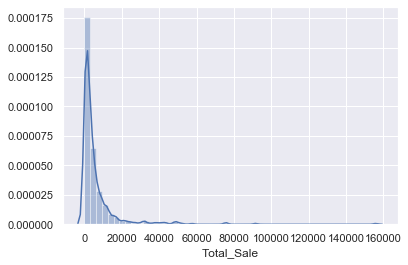

In [45]:
# Verifying the distribution for the 'Total_Sale' column -

sns.distplot(df_total_sale['Total_Sale'])

In [46]:
# checking the skewness of the above distribution
df_total_sale['Total_Sale'].skew()

6.0152325462191305

### Observation:

Total_sale data is not following perfect normal distribution, it has a long right leg - so the distribution is right skewed.
We need to perform some transformation on the column to give it a normal distribution shape. <br>
<br>
Current skewness value is -> 6.015

<font color='crimson'>
    
#### Log Transform
    
    
</font>

In [47]:
# log Transform

skew_handle = np.log(df_total_sale['Total_Sale'])
skew_handle.skew()

-0.6879352339554248

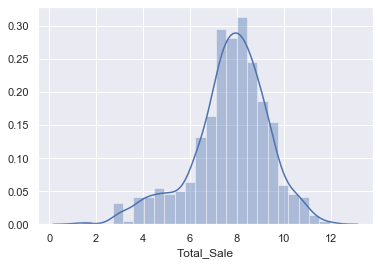

In [48]:
# Checking the distribution of the transformed data

sns.distplot(skew_handle)

<font color='crimson'>
    
#### Square Root Transform
    
    
</font>

In [49]:
# Square Root Transform

sqrt_skew_handle = np.sqrt(df_total_sale['Total_Sale'])
sqrt_skew_handle.skew()

2.171590073295605

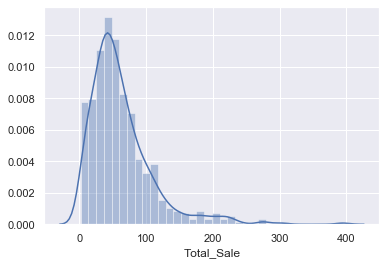

In [50]:
sns.distplot(sqrt_skew_handle)

<font color='crimson'>
    
#### Box-Cox Transform
    
    
</font>

In [51]:
# Box-Cox Transform

boxcox_transform = stats.boxcox(df_total_sale['Total_Sale'])[0]
pd.Series(boxcox_transform).skew()

0.017196717275452442

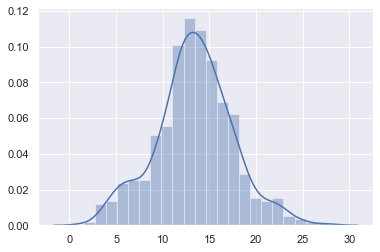

In [52]:
# Checking the distribution of the transformed data

sns.distplot(boxcox_transform)

<font color='green'>
    
#### Skewness for Box-Cox transofrm is very low -> 0.0172, so we can choose this transform.
    
    
</font>

In [53]:
df_total_sale['Total_Sale'] = stats.boxcox(df_total_sale['Total_Sale'])[0]

In [54]:
df_total_sale['Total_Sale']

0      24.628272
1      23.135218
2       7.730647
3      22.081889
4      22.479040
         ...    
495    16.954507
496    19.153505
497    18.060039
498    15.308235
499    17.983202
Name: Total_Sale, Length: 500, dtype: float64

<font color='orange'>
    
#### Merging both the dataset and separating dependent (Y) and independent variable (X).
    
    
    
</font>

In [55]:
# Merging 'df_attr_drop' and 'df_total_sale' two dataframe on common column 'Dress_ID'

df_combined = df_attr_drop.merge(df_total_sale, on='Dress_ID', how = 'inner')
df_combined

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Recommendation,Total_Sale
0,1006032852,Sexy,Low,4.6000,M,Summer,o-neck,Sleeveless,empire,cotton,animal,1,24.628272
1,1212192089,Casual,Low,3.5286,L,Summer,o-neck,Petal,natural,microfiber,animal,0,23.135218
2,1190380701,vintage,High,3.5286,L,Autumn,o-neck,full,natural,polyster,print,0,7.730647
3,966005983,Brief,Average,4.6000,L,Spring,o-neck,full,natural,silk,print,1,22.081889
4,876339541,cute,Low,4.5000,M,Summer,o-neck,butterfly,natural,chiffonfabric,dot,0,22.479040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,990559192,Brief,Average,4.7000,M,Winter,o-neck,half,natural,acrylic,striped,0,11.842336
546,713391965,Casual,Low,4.7000,M,Spring,o-neck,full,natural,polyster,solid,1,16.954507
547,532874347,Casual,Average,4.7000,M,Summer,v-neck,full,empire,cotton,solid,1,18.060039
548,655464934,Casual,Average,4.6000,L,Winter,boat-neck,Sleeveless,empire,silk,print,1,15.308235


<font color='darkorange'>
    
### Working with the combined dataset 
    
    
</font>

In [56]:
# separating categorical variables for different plotting

df_cat = df_combined.select_dtypes(include='object').copy()
df_cat['Total_Sale'] = df_combined.loc[df_cat.index, 'Total_Sale'].copy()

In [57]:
df_cat.head()

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,Pattern Type,Total_Sale
0,Sexy,Low,M,Summer,o-neck,Sleeveless,empire,cotton,animal,24.628272
1,Casual,Low,L,Summer,o-neck,Petal,natural,microfiber,animal,23.135218
2,vintage,High,L,Autumn,o-neck,full,natural,polyster,print,7.730647
3,Brief,Average,L,Spring,o-neck,full,natural,silk,print,22.081889
4,cute,Low,M,Summer,o-neck,butterfly,natural,chiffonfabric,dot,22.479040


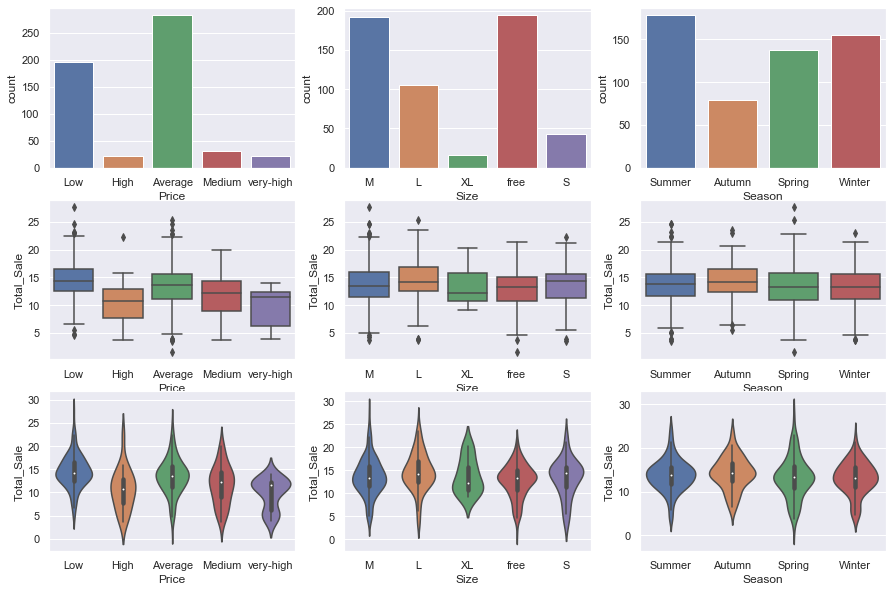

In [58]:
# Verifying COunt Plot, Box Plot and Violin plot for 3-Categorical columns - Price, Size and Season

fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(3,3,1)
sns.countplot(data = df_cat, x = 'Price', ax=ax1)

ax2 = fig.add_subplot(3,3,2)
sns.countplot(data = df_cat, x = 'Size', ax=ax2)

ax3 = fig.add_subplot(3,3,3)
sns.countplot(data = df_cat, x = 'Season', ax=ax3)

ax4 = fig.add_subplot(3,3,4)
sns.boxplot(data = df_cat, x = 'Price', y = 'Total_Sale' , ax=ax4)

ax5 = fig.add_subplot(3,3,5)
sns.boxplot(data = df_cat, x = 'Size', y = 'Total_Sale', ax=ax5)

ax6 = fig.add_subplot(3,3,6)
sns.boxplot(data = df_cat, x = 'Season', y = 'Total_Sale', ax=ax6)

ax7 = fig.add_subplot(3,3,7)
sns.violinplot(data = df_cat, x = 'Price', y = 'Total_Sale' , ax=ax7)

ax8 = fig.add_subplot(3,3,8)
sns.violinplot(data = df_cat, x = 'Size', y = 'Total_Sale', ax=ax8)

ax9 = fig.add_subplot(3,3,9)
sns.violinplot(data = df_cat, x = 'Season', y = 'Total_Sale', ax=ax9)



<font color='crimson'>
    
#### Encoding categorical variables, and train-test split of dataset
    
    
</font>

In [59]:
# Splitting dataset on dependent / target variable (Y) and independent variable (X)

df_X = df_combined.drop('Recommendation', axis=1)
df_Y = df_combined['Recommendation']

In [60]:
# importing one hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# creating one hot encoder object 

onehotencoder = OneHotEncoder(handle_unknown='ignore') # To ignore the categories not seen during training, we can use the given parameter
X = onehotencoder.fit_transform(df_X).toarray()

#labelencoder = LabelEncoder()
#X = df_X.apply(labelencoder.fit_transform)


In [61]:
# Now splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df_Y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440, 1064)
(110, 1064)
(440,)
(110,)


In [62]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<font color='crimson'>
    
### Model Test-1: Logistic Regression
    
    
</font>

In [63]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [64]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

y_test
y_pred_lr

results = confusion_matrix(y_test, y_pred_lr)

print('*'*50)
print('confusion matrix: ')
results


**************************************************
confusion matrix: 


array([[50,  5],
       [36, 19]], dtype=int64)

In [65]:
def F1Score_cal(resultsMatrix):
    TP = resultsMatrix[0][0] # true positive
    FP = resultsMatrix[0][1] # false positive
    FN = resultsMatrix[1][0] # false negative
    TN = resultsMatrix[1][1] # true negative
    
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    accuracy = (TP+TN) / (TP+FP+TN+FN)
    F1_score = 2 * ((precision * recall) /(precision + recall))
    
    return accuracy, F1_score

In [66]:
print('Calculated accuracy and F1_score is: ')
lr_res = F1Score_cal(results)
lr_res

Calculated accuracy and F1_score is: 


(0.6272727272727273, 0.7092198581560284)

In [67]:
auc_lr = roc_auc_score(y_test, y_pred_lr).round(2) # Area Under Curve (AUC)

In [68]:
# writing a function for ROC curve 

def ROC_Curve_model(test_Y, pred_Y):
    auc = roc_auc_score(test_Y, pred_Y) # Area Under Curve (AUC)
    fpr, tpr, thresholds = roc_curve(test_Y, pred_Y) # calculation of fpr and tpr
    
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

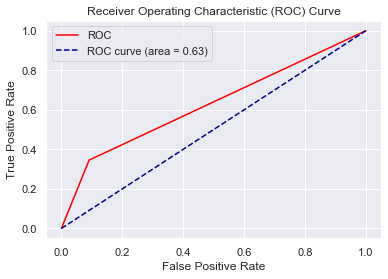

In [67]:
# ROC curve for Linear Regression model

ROC_Curve_model(y_test, y_pred_lr)

<font color='crimson'>
    
### Model Test-2: K-Nearest Neighbours
    
    
</font>

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [69]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

y_test
y_pred_knn

results2 = confusion_matrix(y_test, y_pred_knn)

print('*'*50)
print('confusion matrix: ')
results2


**************************************************
confusion matrix: 


array([[40, 15],
       [34, 21]], dtype=int64)

In [70]:
print('Calculated accuracy and F1_score is: ')
knn_res = F1Score_cal(results2)
knn_res

Calculated accuracy and F1_score is: 


(0.5545454545454546, 0.6201550387596899)

In [71]:
auc_knn = roc_auc_score(y_test, y_pred_knn).round(2) # Area Under Curve (AUC)

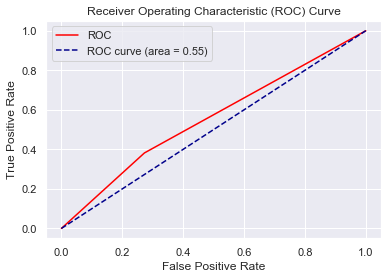

In [72]:
# ROC curve for KNN model

ROC_Curve_model(y_test, y_pred_knn)

<font color='crimson'>
    
### Model Test-3: Decision Tree
    
    
</font>

In [73]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10, random_state=110, max_features=None, min_samples_leaf=15)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [74]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

y_test
y_pred_dt

results3 = confusion_matrix(y_test, y_pred_dt)

print('*'*50)
print('confusion matrix: ')
results3

**************************************************
confusion matrix: 


array([[39, 16],
       [31, 24]], dtype=int64)

In [75]:
print('Calculated accuracy and F1_score is: ')
dt_res = F1Score_cal(results3)
dt_res

Calculated accuracy and F1_score is: 


(0.5727272727272728, 0.6239999999999999)

In [76]:
auc_dt = roc_auc_score(y_test, y_pred_dt).round(2) # Area Under Curve (AUC)

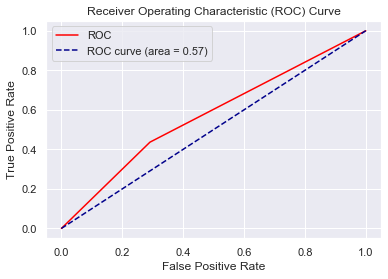

In [77]:
# ROC curve for Decision Tree model

ROC_Curve_model(y_test, y_pred_dt)

<font color='crimson'>
    
### Model Test-4: Support Vector Machine (SVM)
    
    
</font>

In [78]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.025, random_state=110)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [79]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

y_test
y_pred_svm

results4 = confusion_matrix(y_test, y_pred_svm)

print('*'*50)
print('confusion matrix: ')
results4

**************************************************
confusion matrix: 


array([[51,  4],
       [45, 10]], dtype=int64)

In [80]:
print('Calculated accuracy and F1_score is: ')
svm_res = F1Score_cal(results4)
svm_res

Calculated accuracy and F1_score is: 


(0.5545454545454546, 0.6754966887417219)

In [81]:
auc_svm = roc_auc_score(y_test, y_pred_svm).round(2) # Area Under Curve (AUC)

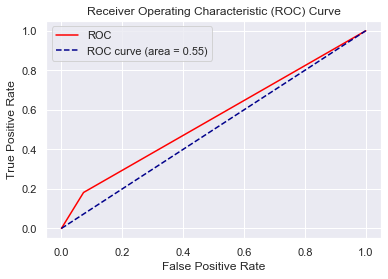

In [82]:
# ROC curve for SVM model

ROC_Curve_model(y_test, y_pred_svm)

<font color='crimson'>
    
### Comparison Matrix for Different ML Models - 
    
    
</font>

In [83]:
comp_martrix = {'LogisticRegression': [(lr_res[0]*100).round(2), lr_res[1], auc_lr], 
                'KNN': [(knn_res[0]*100).round(2), knn_res[1], auc_knn], 
                'Decision Tree': [(dt_res[0]*100).round(2), dt_res[1], auc_dt], 
                'SVM': [(svm_res[0]*100).round(2), svm_res[1], auc_svm]}

df_comp_matrix = pd.DataFrame(comp_martrix, columns = ['LogisticRegression', 'KNN', 'Decision Tree', 'SVM'], 
                              index = ['Accuracy %', 'F1-Score', 'AUC_Score' ])

print('*'*50)
print('Comparison Matrix: ')
df_comp_matrix

**************************************************
Comparison Matrix: 


,LogisticRegression,KNN,Decision Tree,SVM
Accuracy %,62.73000,55.450000,57.270,55.450000
F1-Score,0.70922,0.620155,0.624,0.675497
AUC_Score,0.63000,0.550000,0.570,0.550000


### Hyper parameter Tuning

In [84]:
# Logistic regression

C_param_range = [0.001,0.01,0.1,1,10,100]

comp_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
comp_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train,y_train)
    
    # Predict using model
    y_pred = lr.predict(X_test)
    
    # Saving accuracy score in table
    comp_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1
    
print(comp_table)

   C_parameter  Accuracy
0        0.001       0.5
1        0.010  0.509091
2        0.100  0.572727
3        1.000  0.627273
4       10.000  0.563636
5      100.000  0.563636


C:\Users\bivas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bivas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [85]:
# KNN

knn_neighbors = [1, 2,3,4,5,7,9,11,13,16,20,23,24,40,50,60,100]

knn_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
knn_table['C_parameter'] = knn_neighbors

j = 0
for i in knn_neighbors:
    
    # Apply logistic regression model to training data
    knn = KNeighborsClassifier(n_neighbors = i, leaf_size=30)
    knn.fit(X_train,y_train)
    
    # Predict using model
    y_pred = knn.predict(X_test)
    
    # Saving accuracy score in table
    knn_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1
    
print(knn_table)

    C_parameter  Accuracy
0             1  0.563636
1             2  0.581818
2             3  0.554545
3             4  0.581818
4             5       0.6
5             7  0.554545
6             9  0.590909
7            11       0.6
8            13  0.609091
9            16  0.609091
10           20  0.581818
11           23  0.609091
12           24  0.609091
13           40  0.563636
14           50  0.554545
15           60  0.563636
16          100  0.536364


### Finally we will go with the Logistic Rgression model

In [86]:
# saving the file to the local file system

import pickle
filename = 'dressRecon_model.pickle'
pickle.dump(lr, open(filename, 'wb'))

In [99]:
# saving the file to the local file system

import pickle
filename = 'onehotencoder_model.pickle'
pickle.dump(onehotencoder, open(filename, 'wb'))

In [87]:
# prediction using the saved file

# ['Sexy', 'Low', 4.6, 'M', 'Summer', 'o-neck', 'Sleeveless', 'empire', 'cotton', 'animal', 25]
loaded_model = pickle.load(open(filename, 'rb'))
results = loaded_model.predict(X_test)
results

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [101]:
# Testing the model output for single data set

input = [[1006002, 'Sexy', 'Low', 4.6000, 'L', 'Autumn', 'o-neck', 'Sleeveless', 'empire', 'cotton', 'animal', 24.6]]
#input = [[112, 'vintage', 'High', 6, 'L', 'Autumn', 'o-neck', 'full', 'natural', 'polyster', 'print', 30.1]]

test = onehotencoder.transform(input) # transform is required as we have onehot encoded model
output = loaded_model.predict(test)
print(output)

[1]


In [92]:
# To verify the version of differet libraries
pip freeze


absl-py==0.9.0
aiofiles==0.5.0
aiohttp==3.6.2
alabaster==0.7.12
alembic==1.4.2
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
APScheduler==3.6.3
argh==0.26.2
asn1crypto==1.3.0
astor==0.8.1
astroid==2.4.1
astropy==4.0.1.post1
async-generator==1.10
async-timeout==3.0.1
atomicwrites==1.4.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.9.1
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.4
blis==0.4.1
bokeh==2.0.2
boto==2.49.0
boto3==1.12.39
botocore==1.15.39
Bottleneck==1.3.2
bs4==0.0.1
cachetools==4.1.0
catalogue==1.0.0
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.4.1
clyent==1.2.2
colorama==0.4.3
colorclass==2.2.0
coloredlogs==10.0
colorhash==1.0.2
comtypes==1.1.7
conda==4.8.3
conda-build==3.18.8
conda-package-handling==1.7.0
conda-verify==3.4.2
contextlib2==0.6.